<font size = 6>Automatically Exercised Parisian Options’ Pricing and Hedging Strategies - Low Discrepancy Sequence</font>
<font size = 4><div style="text-align: right"> Contributor: Haochen Jiang</div></font>
<font size = 4><div style="text-align: right"> May 8, 2021</div></font>

In [4]:
import psutil as ps
import time

print("PC Physical CPU Number : {}.".format(ps.cpu_count()))
print("PC Logical CPU Number : {}.".format(ps.cpu_count(logical=False)))
print("PC Total Memory : {} bytes.".format(ps.virtual_memory().total))
print("PC Used Memory : {} bytes.".format(ps.virtual_memory().used))
print("PC Used Memory Accounts for : {}%.".format(ps.virtual_memory().percent))

PC Physical CPU Number : 32.
PC Logical CPU Number : 8.
PC Total Memory : 269763182592 bytes.
PC Used Memory : 18869809152 bytes.
PC Used Memory Accounts for : 7.7%.


In [5]:
! pip install sobol_seq
! pip install ghalton

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sobol_seq
import pandas as pd
from decimal import Decimal
import ghalton

## Normal Distribution Sequence Generating Fuctions

In [4]:
def Box_Muller(x):
    if x.ndim == 1:
        y = np.random.rand(x.shape[0])
    elif x.ndim == 2:
        y = np.random.rand(x.shape[0], x.shape[1])
    else:
        raise ValueError("Input Error: ndim is out of range!")
    return (-2 * np.log(x)) ** 0.5 * np.cos(2 * np.pi * y)


def quasi_seq_uniform_to_randomized_std_normal(x):
    if x.ndim == 1:
        y = np.random.rand(x.shape[0])
    elif x.ndim == 2:
        y = np.random.rand(x.shape[0], x.shape[1])
    else:
        raise ValueError("Input Error: ndim is out of range!")
    return Box_Muller(np.mod(x + y, 1))

# Low Discrepancy Sequence

## Sobol Sequence

### Use i4_sobol to generate a single Sobol vector.

In [12]:
help(sobol_seq.i4_sobol)

Help on function i4_sobol in module sobol_seq.sobol_seq:

i4_sobol(dim_num, seed)
    i4_sobol generates a new quasirandom Sobol vector with each call.
    
    Discussion:
      The routine adapts the ideas of Antonov and Saleev.
    
    Reference:
      Antonov, Saleev,
      USSR Computational Mathematics and Mathematical Physics,
      Volume 19, 1980, pages 252 - 256.
    
      Paul Bratley, Bennett Fox,
      Algorithm 659:
      Implementing Sobol's Quasirandom Sequence Generator,
      ACM Transactions on Mathematical Software,
      Volume 14, Number 1, pages 88-100, 1988.
    
      Bennett Fox,
      Algorithm 647:
      Implementation and Relative Efficiency of Quasirandom
      Sequence Generators,
      ACM Transactions on Mathematical Software,
      Volume 12, Number 4, pages 362-376, 1986.
    
      Ilya Sobol,
      USSR Computational Mathematics and Mathematical Physics,
      Volume 16, pages 236-242, 1977.
    
      Ilya Sobol, Levitan,
      The Production of 

In [13]:
vec, seed = sobol_seq.i4_sobol(4, 1)
print(vec)
print(seed)

[0.5 0.5 0.5 0.5]
2


### Use i4_sobol_generate to generate a Sobol sequence.
For example, if you want to have the first 5 three-dimensional Sobol numbers, run:

In [14]:
help(sobol_seq.i4_sobol_generate)

Help on function i4_sobol_generate in module sobol_seq.sobol_seq:

i4_sobol_generate(dim_num, n, skip=0)
    i4_sobol_generate generates a Sobol dataset.
    
    Parameters:
      Input, integer dim_num, the spatial dimension.
      Input, integer N, the number of points to generate.
      Input, integer SKIP, the number of initial points to skip.
    
      Output, real R(M,N), the points.



In [15]:
x1 = sobol_seq.i4_sobol_generate(3, 5)
print(x1)

[[0.5   0.5   0.5  ]
 [0.75  0.25  0.75 ]
 [0.25  0.75  0.25 ]
 [0.375 0.375 0.625]
 [0.875 0.875 0.125]]


### Use i4_sobol_generate_std_normal to generate (multivariate) standard normal quasi-random variables. 
For example, if you want to have the first 5 realisations of a three-dimensional standard normal quasi-random variable, run:

In [16]:
help(sobol_seq.i4_sobol_generate_std_normal)

Help on function i4_sobol_generate_std_normal in module sobol_seq.sobol_seq:

i4_sobol_generate_std_normal(dim_num, n, skip=0)
    Generates multivariate standard normal quasi-random variables.
    
    Parameters:
      Input, integer dim_num, the spatial dimension.
      Input, integer n, the number of points to generate.
      Input, integer SKIP, the number of initial points to skip.
    
      Output, real np array of shape (n, dim_num).



In [17]:
x2 = sobol_seq.i4_sobol_generate_std_normal(3, 5)
print(x2)

[[ 0.          0.          0.        ]
 [ 0.67448975 -0.67448975  0.67448975]
 [-0.67448975  0.67448975 -0.67448975]
 [-0.31863936 -0.31863936  0.31863936]
 [ 1.15034938  1.15034938 -1.15034938]]


## Halton Sequence

The library contains two generators one producing the standard Halton sequence and the other a generalized version of it. 


### Use Halton to generate a standard Halton sequence.
The constructor takes a single argument, which is the dimensionalty of the sequence.

In [18]:
help(ghalton.Halton)

Help on class Halton in module ghalton.ghalton_wrapper:

class Halton(GeneralizedHalton)
 |  Halton(inDim)
 |  
 |  Method resolution order:
 |      Halton
 |      GeneralizedHalton
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __del__ lambda self
 |  
 |  __getattr__ lambda self, name
 |  
 |  __init__(self, inDim)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__ = _swig_repr(self)
 |  
 |  __setattr__ lambda self, name, value
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __swig_destroy__ = delete_Halton(...)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __swig_getmethods__ = {}
 |  
 |  __swig_setmethods__ = {}
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from GeneralizedHalton:
 |  
 |  get(self, inCount=1)
 |

In [19]:
ghalton.Halton(1).get(5)
ghalton.Halton(1).get(5)

[[0.5], [0.25], [0.75], [0.125], [0.625]]

The halton sequence produce points in sequence, to reset it call sequencer.reset().

In [20]:
sequencer = ghalton.Halton(1)
sequencer.get(5)
sequencer.get(5)
sequencer.reset()
sequencer.get(5)

[[0.5], [0.25], [0.75], [0.125], [0.625]]

### Use GeneralizedHalton to generate a generalized Halton sequence.
The constructor takes at least one argument, either the dimensionality, or a configuration. When the dimensionality is given, an optional argument can be used to seed for the random permutations created.

In [21]:
help(ghalton.GeneralizedHalton)

Help on class GeneralizedHalton in module ghalton.ghalton_wrapper:

class GeneralizedHalton(builtins.object)
 |  GeneralizedHalton(*args)
 |  
 |  Methods defined here:
 |  
 |  __del__ lambda self
 |  
 |  __getattr__ lambda self, name
 |  
 |  __init__(self, *args)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__ = _swig_repr(self)
 |  
 |  __setattr__ lambda self, name, value
 |  
 |  get(self, inCount=1)
 |  
 |  reset(self)
 |  
 |  seed(self, *args)
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __swig_destroy__ = delete_GeneralizedHalton(...)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------

It is the SAME as fomrer one ? ?

In [22]:
ghalton.GeneralizedHalton(1, 9999).get(5)
ghalton.GeneralizedHalton(1, 9999).get(5)

[[0.5], [0.25], [0.75], [0.125], [0.625]]

In [23]:
sequencer = ghalton.GeneralizedHalton(1, 9999)
sequencer.get(5)
sequencer.get(5)
sequencer.reset()
sequencer.get(5)

[[0.5], [0.25], [0.75], [0.125], [0.625]]

A configuration is a series of permutations each of n_i numbers, where n_i is the n_i'th prime number. The dimensionality is infered from the number of sublists given.

### Waiting to analyze...

In [24]:
perms = (
    (0, 1),
    (0, 2, 1),
    (0, 4, 2, 3, 1),
    (0, 6, 5, 4, 3, 2, 1),
    (0, 8, 2, 10, 4, 9, 5, 6, 1, 7, 3),
)
sequencer = ghalton.GeneralizedHalton(perms)
sequencer.get(5)

[[0.5, 0.6666666666666666, 0.8, 0.8571428571428571, 0.7272727272727273],
 [0.25, 0.3333333333333333, 0.4, 0.7142857142857143, 0.18181818181818182],
 [0.75, 0.2222222222222222, 0.6, 0.5714285714285714, 0.9090909090909091],
 [0.125, 0.8888888888888888, 0.2, 0.42857142857142855, 0.36363636363636365],
 [0.625, 0.5555555555555556, 0.16, 0.2857142857142857, 0.8181818181818182]]

## Sequences Comparison

### Generate Sequence by Linear Congruential Method

In [25]:
seq1 = np.random.rand(2000, 28)
x1 = np.random.randn(1, 2000)

### Generate Sobol Sequence

In [26]:
seq2 = sobol_seq.i4_sobol_generate(28, 2000)
x2 = sobol_seq.i4_sobol_generate_std_normal(1, 2000)

### Generate Halton Sequence

In [27]:
seq3 = np.array(ghalton.Halton(28).get(2000))
x3 = Box_Muller(np.array(ghalton.Halton(1).get(2000)))

### Dimensional correlation

Text(0, 0.5, 'Twenty-eighth Dimension')

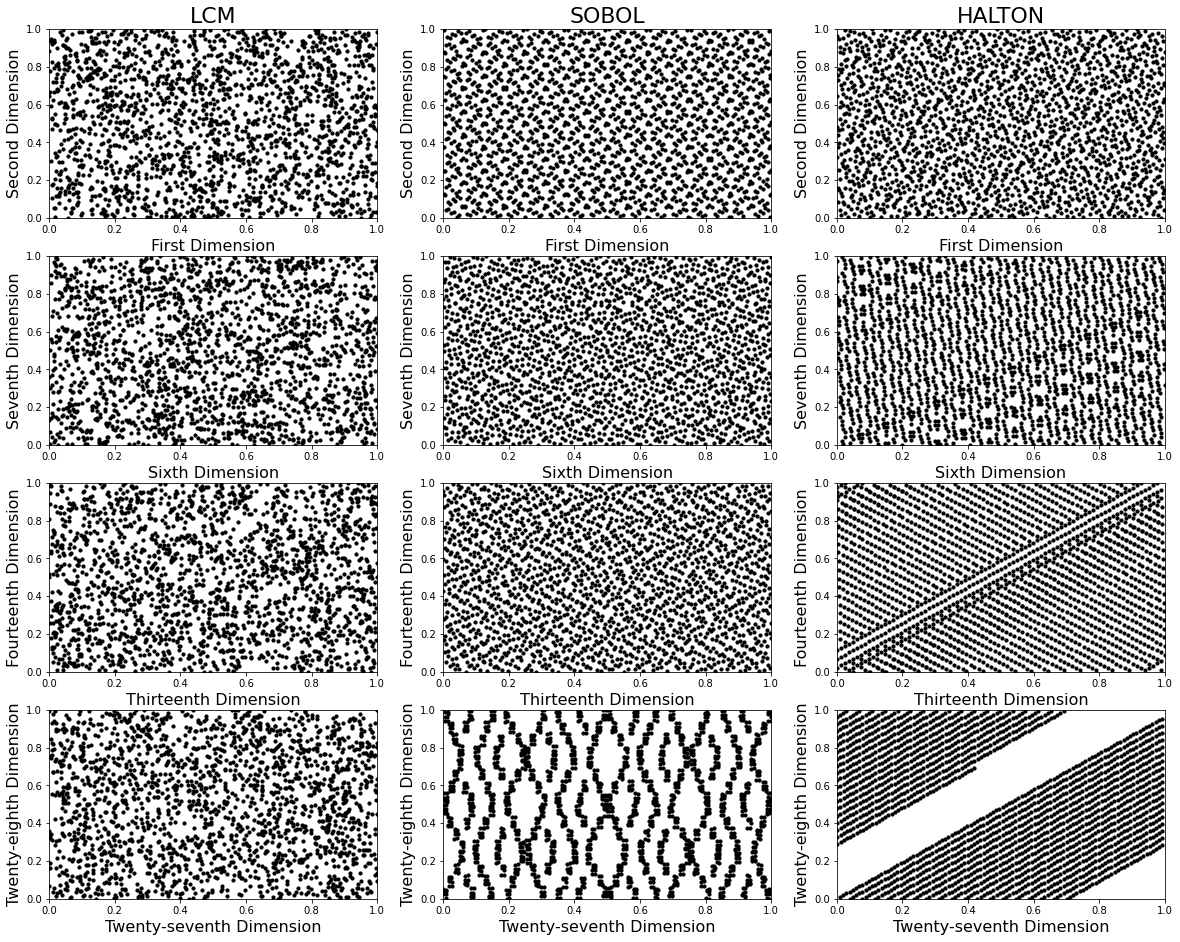

In [29]:
fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(4, 3, 1)
plt.scatter(x=seq1[:, 0], y=seq1[:, 1], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("First Dimension", fontsize=16)
plt.ylabel("Second Dimension", fontsize=16)
plt.title("LCM", fontsize=22)
ax2 = fig.add_subplot(4, 3, 2)
plt.scatter(x=seq2[:, 0], y=seq2[:, 1], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("First Dimension", fontsize=16)
plt.ylabel("Second Dimension", fontsize=16)
plt.title("SOBOL", fontsize=22)
ax3 = fig.add_subplot(4, 3, 3)
plt.scatter(x=seq3[:, 0], y=seq3[:, 1], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("First Dimension", fontsize=16)
plt.ylabel("Second Dimension", fontsize=16)
plt.title("HALTON", fontsize=22)

ax4 = fig.add_subplot(4, 3, 4)
plt.scatter(x=seq1[:, 5], y=seq1[:, 6], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Sixth Dimension", fontsize=16)
plt.ylabel("Seventh Dimension", fontsize=16)
ax5 = fig.add_subplot(4, 3, 5)
plt.scatter(x=seq2[:, 5], y=seq2[:, 6], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Sixth Dimension", fontsize=16)
plt.ylabel("Seventh Dimension", fontsize=16)
ax6 = fig.add_subplot(4, 3, 6)
plt.scatter(x=seq3[:, 5], y=seq3[:, 6], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Sixth Dimension", fontsize=16)
plt.ylabel("Seventh Dimension", fontsize=16)

ax7 = fig.add_subplot(4, 3, 7)
plt.scatter(x=seq1[:, 12], y=seq1[:, 13], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Thirteenth Dimension", fontsize=16)
plt.ylabel("Fourteenth Dimension", fontsize=16)
ax8 = fig.add_subplot(4, 3, 8)
plt.scatter(x=seq2[:, 12], y=seq2[:, 13], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Thirteenth Dimension", fontsize=16)
plt.ylabel("Fourteenth Dimension", fontsize=16)
ax9 = fig.add_subplot(4, 3, 9)
plt.scatter(x=seq3[:, 12], y=seq3[:, 13], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Thirteenth Dimension", fontsize=16)
plt.ylabel("Fourteenth Dimension", fontsize=16)

ax10 = fig.add_subplot(4, 3, 10)
plt.scatter(x=seq1[:, 26], y=seq1[:, 27], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Twenty-seventh Dimension", fontsize=16)
plt.ylabel("Twenty-eighth Dimension", fontsize=16)
ax11 = fig.add_subplot(4, 3, 11)
plt.scatter(x=seq2[:, 26], y=seq2[:, 27], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Twenty-seventh Dimension", fontsize=16)
plt.ylabel("Twenty-eighth Dimension", fontsize=16)
ax12 = fig.add_subplot(4, 3, 12)
plt.scatter(x=seq3[:, 26], y=seq3[:, 27], s=10, marker="o", color="k")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Twenty-seventh Dimension", fontsize=16)
plt.ylabel("Twenty-eighth Dimension", fontsize=16)

### One dimension Distribution Comparison

CPU times: user 227 ms, sys: 5.97 ms, total: 233 ms
Wall time: 228 ms


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

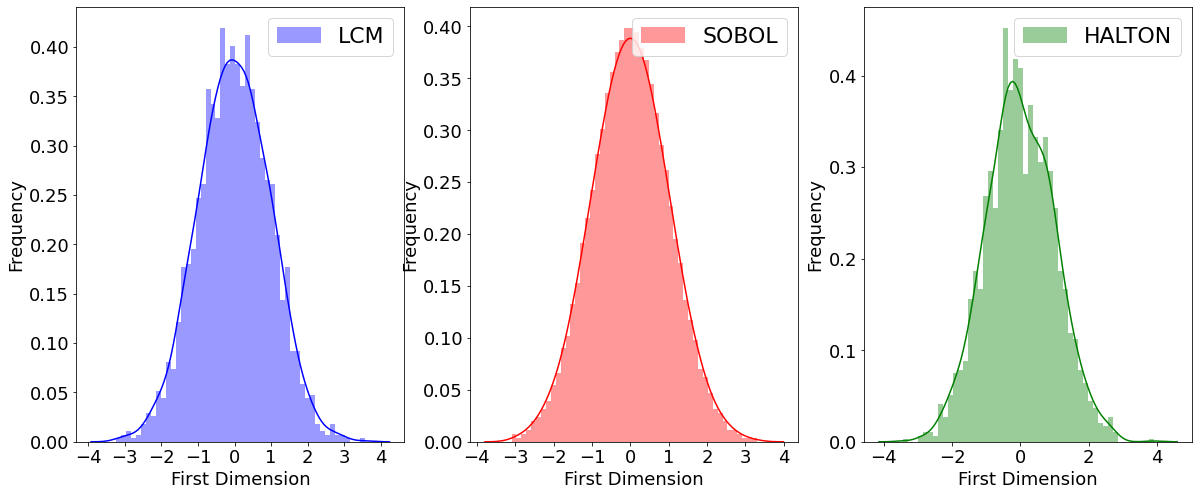

In [30]:
%%time
fig = plt.figure(figsize=(20, 8))
ax1 = fig.add_subplot(1, 3, 1)
sns.distplot(x1, bins=50, color="b", label="LCM")
plt.xlabel("First Dimension", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend(fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax2 = fig.add_subplot(1, 3, 2)
sns.distplot(x2, bins=50, color="r", label="SOBOL")
plt.xlabel("First Dimension", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend(fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax3 = fig.add_subplot(1, 3, 3)
sns.distplot(x3, bins=50, color="g", label="HALTON")
plt.xlabel("First Dimension", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.legend(fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)